In [40]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras

import numpy as np

import matplotlib.pyplot as plt

In [41]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train, y_test)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]


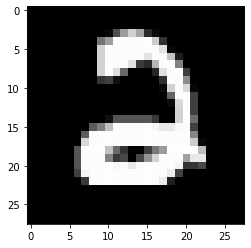

In [42]:
plt.imshow(x_train[82], cmap='gray')


In [43]:
# flatten (vectorize) for ANN
x_train_flatten = x_train.reshape(60000, 784)
x_test_flatten = x_test.reshape(10000, 784)

num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

print(y_train.shape, '\n', y_train[0])    # one-hot coding

(60000, 10) 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### ANN

In [44]:
model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_categories, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [26]:
# number of the parameters in each layer
print('1st layer:', (784 + 1)*512)  # 1: bias
print('2nd layer:', (512 + 1)*512)
print('3rd layer:', (512 + 1)*10)


1st layer: 401920
2nd layer: 262656
3rd layer: 5130


In [45]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_flatten, y_train,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test_flatten, y_test))


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 7.0980 - accuracy: 0.8477 - val_loss: 0.4936 - val_accuracy: 0.9427
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5019 - accuracy: 0.9313 - val_loss: 0.4204 - val_accuracy: 0.9399
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3965 - accuracy: 0.9408 - val_loss: 0.3519 - val_accuracy: 0.9355
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3789 - accuracy: 0.9459 - val_loss: 0.3348 - val_accuracy: 0.9400
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3853 - accuracy: 0.9480 - val_loss: 0.6759 - val_accuracy: 0.9223


### Convolutional Neural Networks

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [47]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(units=num_categories, activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
flatten_4 (Flatten)          (None, 58800)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                588010    
Total params: 588,760
Trainable params: 588,760
Non-trainable params: 0
_________________________________________________________________


In [48]:
# number of the parameters in each layer
print('1st layer:', (3*3 + 1)*75)  # 1: bias
print('3rd layer:', (58800 + 1)*10)


1st layer: 750
3rd layer: 588010


In [58]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

x_train_conv = x_train.reshape(-1,28,28,1)
x_test_conv = x_test.reshape(-1,28,28,1)

model.fit(x_train_conv, y_train, epochs=5, verbose=1, validation_data=(x_test_conv, y_test))


Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.0453 - val_accuracy: 0.9916
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.0529 - val_accuracy: 0.9904
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0460 - val_accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.0417 - val_accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0511 - val_accuracy: 0.9911


### Deep Convolutional Neural Networks

In [52]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_categories, activation="softmax"))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 50)        

In [57]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

x_train_conv = x_train.reshape(-1,28,28,1)
x_test_conv = x_test.reshape(-1,28,28,1)

model.fit(x_train_conv, y_train, epochs=20, verbose=1, validation_data=(x_test_conv, y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 6ms/step - loss: 0.2698 - accuracy: 0.9189 - val_loss: 0.0667 - val_accuracy: 0.9813
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0619 - accuracy: 0.9831 - val_loss: 0.0423 - val_accuracy: 0.9877
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0520 - accuracy: 0.9872 - val_loss: 0.0607 - val_accuracy: 0.9862
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0446 - accuracy: 0.9890 - val_loss: 0.0354 - val_accuracy: 0.9904
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0383 - accuracy: 0.9908 - val_loss: 0.0615 - val_accuracy: 0.9847
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0352 - accuracy: 0.9916 - val_loss: 0.0484 - val_accuracy: 0.9884
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0329 - accuracy: 0.9922 - val_loss: 0.0632 - val_ac

### Data augmentation

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

batch_size = 32
img_iter = datagen.flow(x_train_conv, y_train, batch_size=batch_size)

In [67]:
model.fit(x_train_conv, y_train, epochs=20, verbose=1, validation_data=(x_test_conv, y_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.0489 - val_accuracy: 0.9928
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0490 - val_accuracy: 0.9910
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0500 - val_accuracy: 0.9913
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0405 - val_accuracy: 0.9930
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.0454 - val_accuracy: 0.9931
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0499 - val_accuracy: 0.9931
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.0496 - val_ac

(3, 3, 1, 75)


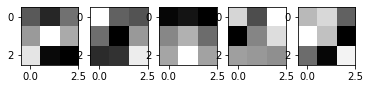

In [75]:
# show the first five filters
filters, biases = model.layers[0].get_weights()
print(filters.shape)
plt.subplot(151)
plt.imshow(filters[:,:,0,0], cmap='gray')
plt.subplot(152)
plt.imshow(filters[:,:,0,1], cmap='gray')
plt.subplot(153)
plt.imshow(filters[:,:,0,2], cmap='gray')
plt.subplot(154)
plt.imshow(filters[:,:,0,3], cmap='gray')
plt.subplot(155)
plt.imshow(filters[:,:,0,4], cmap='gray')
plt.show()
